In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

S18
54
['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'OOB', 'BULL', 'BULLO']
{'S1': 0.0, 'S2': 0.0, 'S3': 0.0, 'S4': 0.022233338723722115, 'S5': 0.0, 'S6': 0.0, 'S7': 0.0, 'S8': 0.0, 'S9': 0.0, 'S10': 0.0, 'S11': 0.0, 'S12': 0.0, 'S13': 0.0, 'S14': 0.0, 'S15': 0.0, 'S16': 0.0, 'S17': 0.0, 'S18': 0.9777666612762764, 'S19': 0.0, 'S20': 0.0, 'D1': 1.0904161207021266e-224, 'D2': 0.0, 'D3': 0.0, 'D4': 0.0, 'D5': 0.0, 'D6': 0.0, 'D7': 0.0, 'D8': 0.0, 'D9': 0.0, 'D10': 0.0, 'D11': 0.0, 'D12': 0.0, 'D13': 0.0, 'D14': 0.0, 'D15': 0.0, 'D16': 0.0, 'D17': 0.0, 'D18': 4.47551033505493e-17, 'D19': 0.0, 'D20': 0.0, 'T1': 0.0, 'T2': 0.0, 'T3': 0.0, 'T4': 1.31

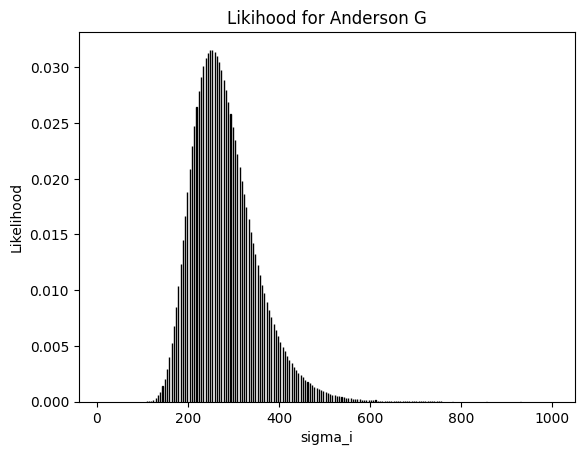

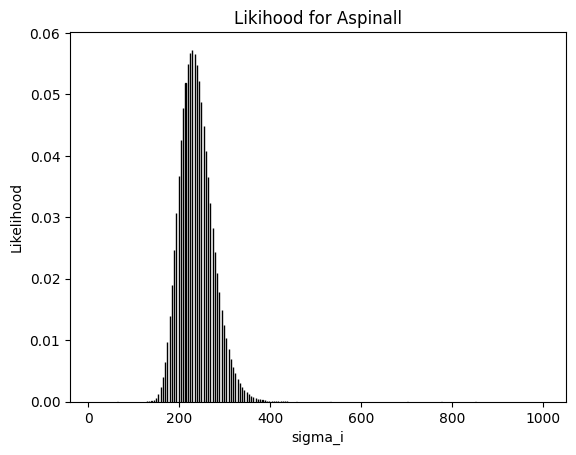

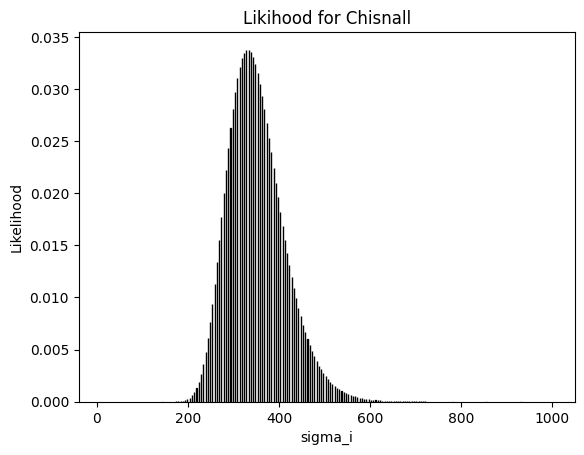

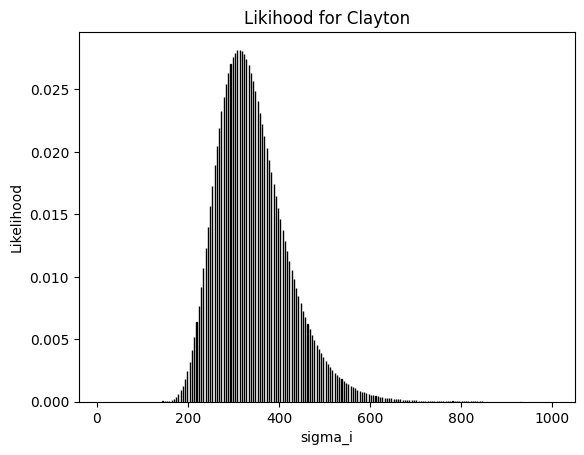

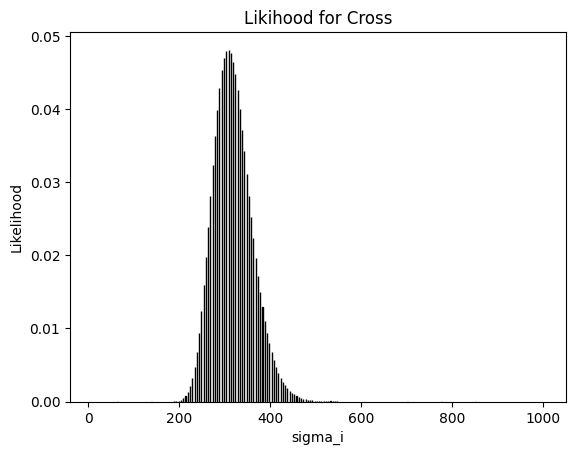

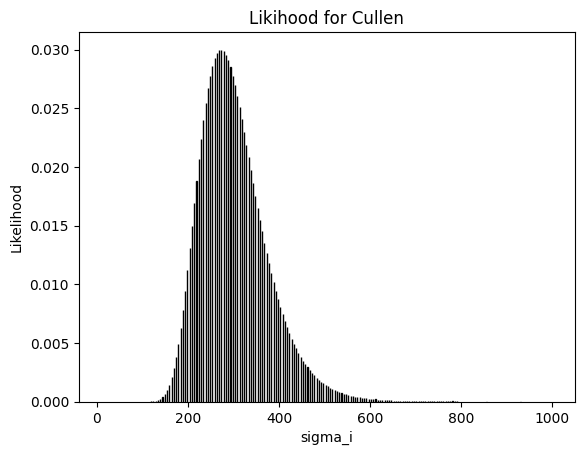

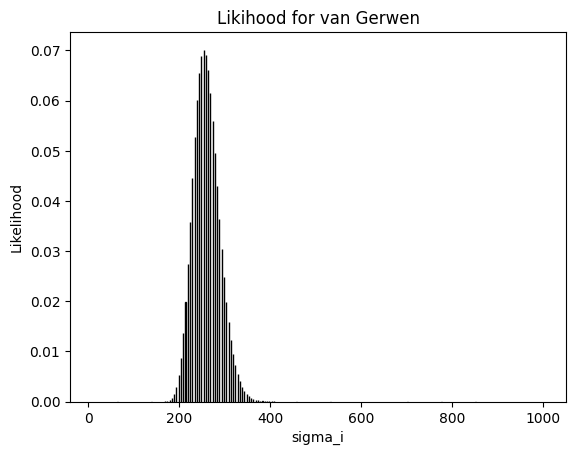

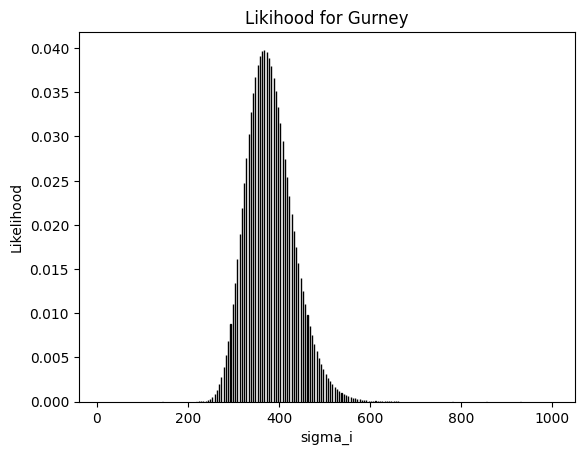

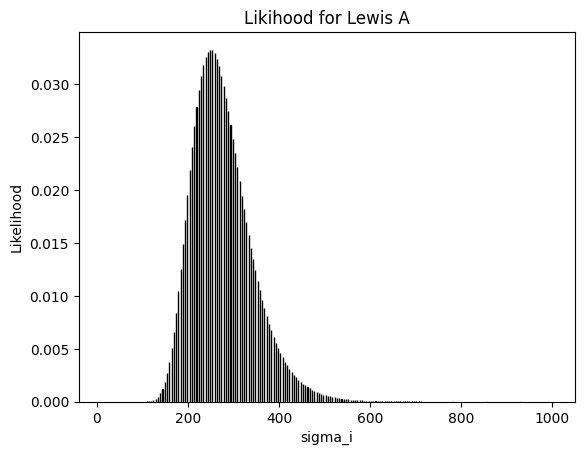

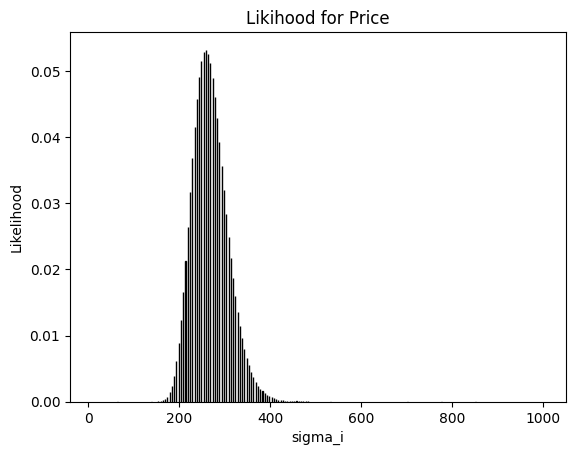

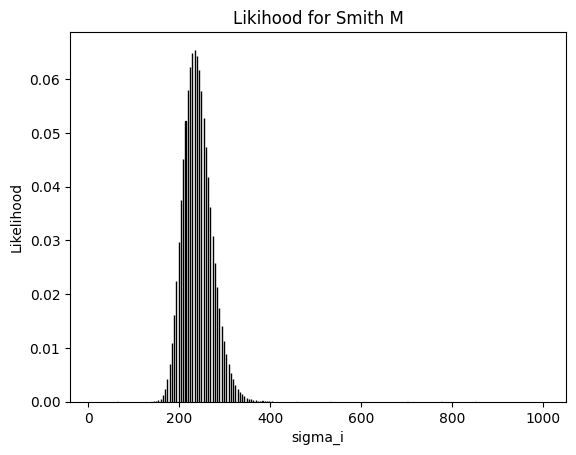

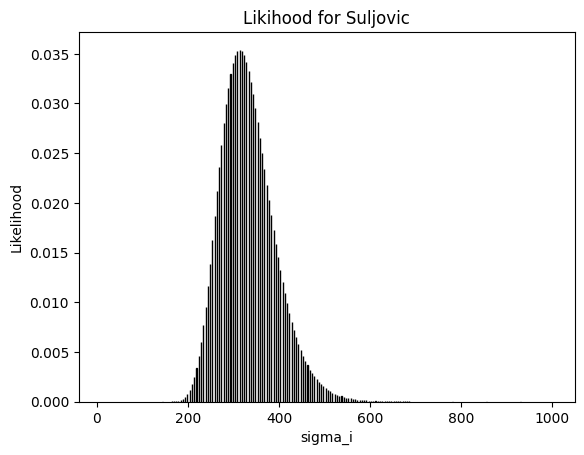

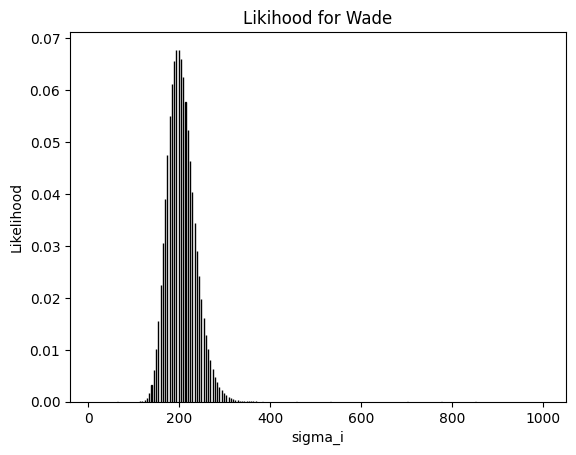

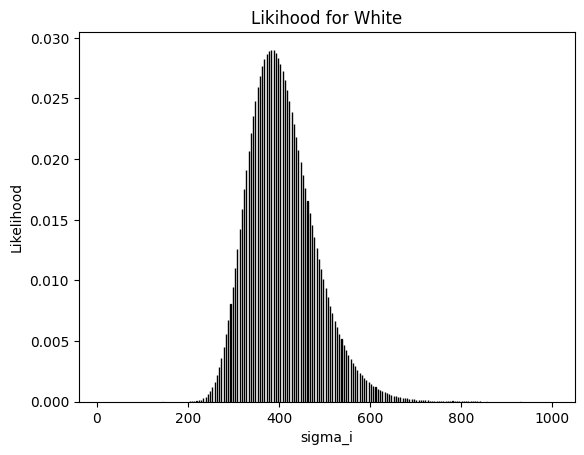

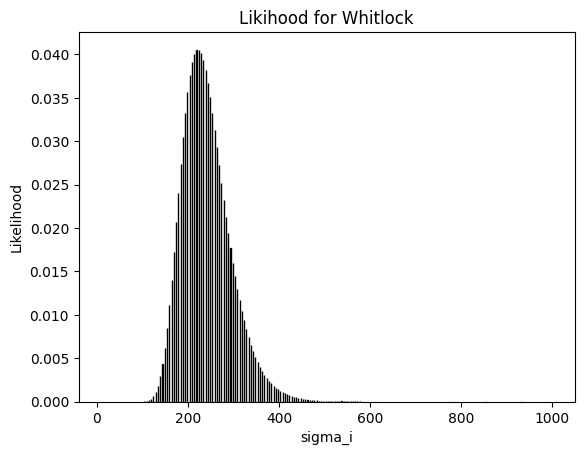

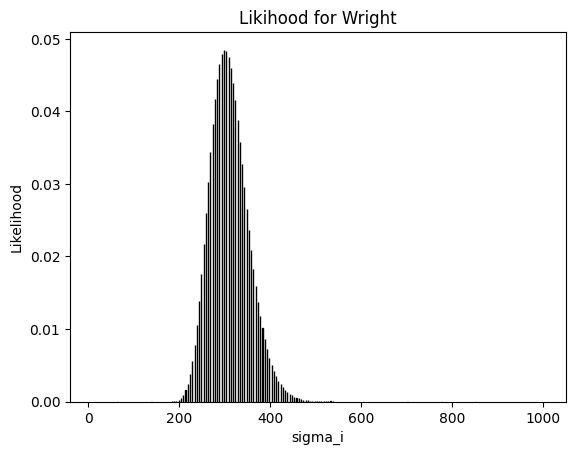

In [22]:
%run bull-likelihood-generation.ipynb

In [23]:
df_doubles_clean

,Player,BULL,BULLO,S20,S19,S18,S17,S16,S15,S14,...,S10,S9,S8,S7,S6,S5,S4,S3,S2,S1
0,Anderson G,6,15,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,Aspinall,19,35,0,0,1,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
2,Chisnall,12,25,0,0,0,1,0,2,1,...,2,1,0,0,0,1,0,2,1,0
3,Clayton,7,17,0,1,0,0,0,0,0,...,0,2,1,0,0,1,0,0,0,0
4,Cross,20,44,1,1,1,2,1,1,0,...,2,1,2,1,0,0,1,2,0,0
5,Cullen,4,18,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,van Gerwen,35,60,0,3,0,1,1,0,1,...,1,0,0,1,0,1,2,4,1,0
7,Gurney,17,44,2,1,0,0,1,0,0,...,0,1,1,1,1,2,2,3,2,1
8,Lewis A,6,17,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9,Price,22,35,1,0,0,0,2,0,0,...,3,0,1,0,0,0,0,0,0,0


In [ ]:
'''
STEP 1: Given we are sampling over N(mu, sigma), what is the likelihood of the data

'''

In [ ]:
#We simply find the MLE lognormal distribution. For the sake of computation, we fix all but one of the parameters.
#Note, this prior depends on the data, and therefore, we introduce shrinkage.

In [33]:
def total_likelihood_sigma(sigma):
    res = 0
    delta = 5
    idx = int((int(sigma/delta)*delta - start)/delta)
    if idx < 0: return 'WRONG'
    for player in df_doubles_clean['Player']:
        res += math.log(player_likelihoods[player][idx])
    return math.exp(res)

In [39]:
total_likelihood_sigma(40)

0.0

In [26]:
from scipy.integrate import quad


In [40]:
def log_likelihood_given_prior(shape, scale):

    expected_value, _ = quad(lambda sigma : total_likelihood_sigma(sigma)* lognorm.pdf(sigma, shape, 0, scale), 40, 999, \
                             limit = 20)

    return math.log(expected_value)

In [44]:
log_likelihood_given_prior(0.2, 200)

-66.35786613414136

In [47]:
'''
mu = np.linspace(0.1, 2, 20)
tau = np.linspace(40,1000, 200)
MAX = -np.infty
for mean in mu:
    for std in tau:
        check = log_likelihood_given_prior(mean, std)
        #print(check)
        if check > MAX: 
            MAX = check
            res = (mean, std)

print(res)
'''


'\nmu = np.linspace(0.1, 2, 20)\ntau = np.linspace(40,1000, 200)\nMAX = -np.infty\nfor mean in mu:\n    for std in tau:\n        check = log_likelihood_given_prior(mean, std)\n        #print(check)\n        if check > MAX: \n            MAX = check\n            res = (mean, std)\n\nprint(res)\n'

In [ ]:
#PRIOR: shape = 0.1, scale = 310.1507537688442(!!!!)